In [ ]:
# Source : https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

In [8]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as shc

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [4]:
df = pd.read_csv("SelfShiksha_ULB_FC47_Mall_Customers.csv")

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
X = np.array(df[["Annual Income (k$)","Spending Score (1-100)"]])

In [7]:
fig = px.scatter(x=X[:,0],y=X[:,1])
fig.show()

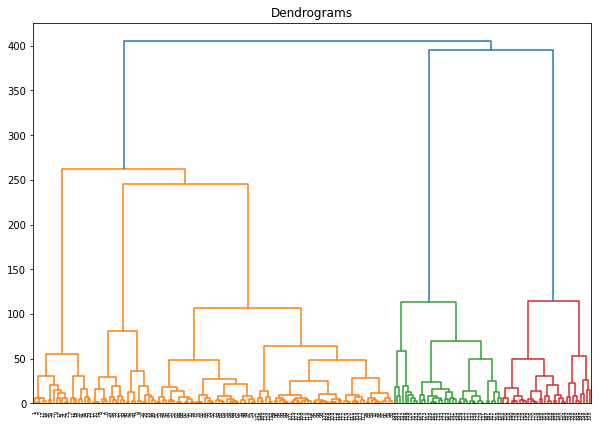

In [9]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [10]:
# WCSS ( Within-Cluster Sum of Square ). 
# WCSS is the sum of squared distance between each point and the centroid in a cluster
# The idea is to choose number of clusters at which the WCSS curve undergoes a transition in the slope.
# Increasing the number of clusters beyong this is not useful.

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [11]:
# In this plot of WCSS, there is no clear elbow point, but n_clusters = 4 seems to be the best choice.
fig = px.line(y=wcss)
fig.update_layout(xaxis_title="Number of Clusters",yaxis_title="WCSS")
fig.show()